In [1]:
import pandas as pd 
import numpy as np

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [2]:
items_path = "2items.csv"
q1_path = "2quarter-1.csv"
q2_path = "2quarter-2.csv"
q3_path = "2quarter-3.csv"


q1= pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)

### `Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [3]:
# 1 & 2
df1 = pd.concat([q1, q2, q3], keys=["Q1", "Q2", "Q3"])
df1

order_id quantity item_id choice_description_id item_price
Q1 0           1        1       1                     1     $3.39 
   1           1        1       2                     2     $3.39 
   2           2        2       4                     3    $16.98 
   3           4        1       7                     6     $9.25 
   4           6        1       9                     8     $8.75 
...          ...      ...     ...                   ...        ...
Q2 2342     1829        1      23                    92    $11.25 
   2343     1830        1      23                  1043    $11.25 
   2344     1832        1      10                   116     $8.75 
   2345     1832        1       8                     0     $4.45 
   2346     1834        1      20                   515    $11.25 

[4622 rows x 5 columns]

In [4]:
# 3

new_df = df1.reset_index().merge(items,on="item_id")
new_df.rename(columns={"level_0": "quarter"}, inplace=True)
new_df.groupby(["quarter","item_name"], as_index = False)["quantity"].sum().sort_values("quantity",ascending = False).drop_duplicates(subset="quarter",keep="first")

,quarter,item_name,quantity
65,Q2,Chicken Bowl,394
17,Q1,Chicken Bowl,367


In [5]:
# 4
new_df["item_price"] = new_df.item_price.apply(lambda x: float(x[1:]))
new_df["total_item_price"] = new_df["item_price"] * new_df["quantity"]
new_df.groupby(["quarter", "item_name"], as_index=False)["total_item_price"].sum().sort_values("total_item_price",ascending=False).drop_duplicates("quarter",keep="first")

,quarter,item_name,total_item_price
65,Q2,Chicken Bowl,4192.25
17,Q1,Chicken Bowl,3852.38


In [6]:
new_df.groupby(["quarter","order_id"], as_index=False)["total_item_price"].sum().groupby("quarter", as_index =False)["total_item_price"].mean()

,quarter,total_item_price
0,Q1,13.809488
1,Q2,13.279828


### `Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [7]:
balls = pd.read_csv("2IPL_Ball_by_Ball_2008_2022.csv")
matches = pd.read_csv("2IPL_Matches_2008_2022.csv")

In [8]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [9]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [10]:
seasondf = balls.merge(matches[["ID", "Season"]], on="ID")
seasondf

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,2022
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,2022
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08


In [11]:
balls.kind.unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [12]:
seasondf["IsBowlerWicket"] = seasondf.kind.apply(lambda x: 1 if x in ["caught", 'caught and bowled', 'bowled', 'stumped','lbw', 'hit wicket'] else 0)
seasondf

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season,IsBowlerWicket
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0


In [13]:
balls.extra_type.unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [14]:
seasondf["BowlerRun"] = seasondf.extra_type.apply(lambda x: 0 if x in ["legbyes", "byes"] else 1) * seasondf["total_run"]
seasondf

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season,IsBowlerWicket,BowlerRun
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,1
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,0
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,1
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,0
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,1


In [15]:
seasondf["IsLegalBall"] = seasondf.extra_type.apply(lambda x: 0 if x in ["wides", "noballs"] else 1)
seasondf

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season,IsBowlerWicket,BowlerRun,IsLegalBall
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0,1
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0,1
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,1,1
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0,1
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,0,1
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,1,1
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,0,1
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,1,0


In [16]:
pcapdf = seasondf.groupby(["Season", "bowler"], as_index = False)[["IsBowlerWicket", "BowlerRun", "IsLegalBall"]].sum()
pcapdf

,Season,bowler,IsBowlerWicket,BowlerRun,IsLegalBall
0,2007/08,A Kumble,7,304,230
1,2007/08,A Mishra,11,138,119
2,2007/08,A Nehra,12,348,269
3,2007/08,A Nel,1,31,18
4,2007/08,A Symonds,0,101,41
...,...,...,...,...,...
1668,2022,VR Iyer,0,46,24
1669,2022,Washington Sundar,6,239,168
1670,2022,YBK Jaiswal,0,6,1
1671,2022,YS Chahal,27,527,408


In [17]:
pcapdf["Economy"] = pcapdf["BowlerRun"] / pcapdf["IsLegalBall"] * 6
pcapdf

,Season,bowler,IsBowlerWicket,BowlerRun,IsLegalBall,Economy
0,2007/08,A Kumble,7,304,230,7.930435
1,2007/08,A Mishra,11,138,119,6.957983
2,2007/08,A Nehra,12,348,269,7.762082
3,2007/08,A Nel,1,31,18,10.333333
4,2007/08,A Symonds,0,101,41,14.780488
...,...,...,...,...,...,...
1668,2022,VR Iyer,0,46,24,11.500000
1669,2022,Washington Sundar,6,239,168,8.535714
1670,2022,YBK Jaiswal,0,6,1,36.000000
1671,2022,YS Chahal,27,527,408,7.750000


In [18]:
pcapdf.sort_values(["IsBowlerWicket", "Economy"], ascending = [False, True]).drop_duplicates("Season", keep = "first").sort_values("Season")


,Season,bowler,IsBowlerWicket,BowlerRun,IsLegalBall,Economy
84,2007/08,Sohail Tanvir,22,266,247,6.461538
174,2009,RP Singh,23,417,358,6.988827
284,2009/10,PP Ojha,21,429,353,7.291785
447,2011,SL Malinga,28,375,378,5.952381
537,2012,M Morkel,25,453,378,7.190476
629,2013,DJ Bravo,32,497,375,7.952000
779,2014,MM Sharma,23,452,323,8.396285
847,2015,DJ Bravo,26,426,314,8.140127
938,2016,B Kumar,23,490,396,7.424242
1048,2017,B Kumar,26,369,314,7.050955


In [19]:
pcapdf.sort_values(["IsBowlerWicket", "Economy"], ascending = [False, True]).drop_duplicates("Season", keep = "first").sort_values("Season")
pcapdf

,Season,bowler,IsBowlerWicket,BowlerRun,IsLegalBall,Economy
0,2007/08,A Kumble,7,304,230,7.930435
1,2007/08,A Mishra,11,138,119,6.957983
2,2007/08,A Nehra,12,348,269,7.762082
3,2007/08,A Nel,1,31,18,10.333333
4,2007/08,A Symonds,0,101,41,14.780488
...,...,...,...,...,...,...
1668,2022,VR Iyer,0,46,24,11.500000
1669,2022,Washington Sundar,6,239,168,8.535714
1670,2022,YBK Jaiswal,0,6,1,36.000000
1671,2022,YS Chahal,27,527,408,7.750000


Match Result from- https://www.mykhel.com/cricket/ipl-purple-cap-winners-list-s4/

### `Q-7:` Best bowler in death overs. 
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [20]:
seasondf

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season,IsBowlerWicket,BowlerRun,IsLegalBall
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0,1
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0,1
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,1,1
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0,1
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,0,0,NaN,NaN,NaN,Rajasthan Royals,2022,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,0,1
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,1,1
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,0,1
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,2007/08,0,1,0


In [21]:
seasondf.overs.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [23]:
death_over = seasondf[seasondf.overs>=15]
pcapdf = death_over.groupby('bowler', as_index = False)[["IsBowlerWicket", "BowlerRun","IsLegalBall"]].sum()
pcapdf["Economy"] = pcapdf["BowlerRun"]/pcapdf["IsLegalBall"] * 6
pcapdf.sort_values(["IsBowlerWicket", "Economy"], ascending = [False, True]).head()

,bowler,IsBowlerWicket,BowlerRun,IsLegalBall,Economy
91,DJ Bravo,115,2161,1385,9.361733
331,SL Malinga,108,1464,1117,7.863921
53,B Kumar,90,1752,1173,8.961637
148,JJ Bumrah,80,1614,1146,8.450262
339,SP Narine,67,1164,949,7.359326


### `Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [24]:
batterdf = seasondf.copy()

In [25]:
batterdf["IsBatsmanBall"] = batterdf["extra_type"].apply(lambda x: 1 if x is 'wides' else 0)

<>:1: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
C:\Users\H\AppData\Local\Temp\ipykernel_16936\894396055.py:1: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  batterdf["IsBatsmanBall"] = batterdf["extra_type"].apply(lambda x: 1 if x is 'wides' else 0)


In [30]:
def bat_record_season(batsman):
    bdf = batterdf[batterdf.batter == batsman].copy()
    bdf["IsBatsmanOut"] = bdf.batter == bdf.player_out
    df = bdf.groupby(["Season", "ID"], as_index = False)[["batsman_run","IsBatsmanBall","IsBatsmanOut"]].sum()
    innings = df.groupby("Season").ID.count()
    df = df.groupby("Season").agg(
        {
            "batsman_run":["sum","max"],
            "IsBatsmanBall":"sum",
            "IsBatsmanOut":"sum"
        }
    )
    
    df["Innings"] = innings
    df["TotalRuns"] = df[("batsman_run","sum")]
    df["Avg"] = df["TotalRuns"]/df[("IsBatsmanOut","sum")]
    df["HighestScore"] = df[("batsman_run","max")]
    df["StrikerRate"] = df["TotalRuns"]/df[("IsBatsmanBall","sum")]*100
    return df.drop(columns = ["batsman_run","IsBatsmanBall","IsBatsmanOut"])

bat_record_season("MS Dhoni")
    

,Innings,TotalRuns,Avg,HighestScore,StrikerRate
,,,,,
Season,,,,,
2007/08,14,414,41.400000,65,inf
2009,13,332,41.500000,58,inf
2009/10,11,287,31.888889,66,inf
2011,13,392,43.555556,70,inf
2012,17,358,32.545455,51,inf
2013,16,461,46.100000,67,inf
2014,15,371,74.200000,57,inf
2015,17,372,31.000000,53,inf


Verify at - https://www.iplt20.com/teams/chennai-super-kings/squad-details/1

### `Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [31]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [32]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [34]:
df = balls.merge(matches[["ID","Player_of_Match"]], on="ID")
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Player_of_Match
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,HH Pandya
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,HH Pandya
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,HH Pandya
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,HH Pandya
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,HH Pandya


In [36]:
batterdf = df[df.batter == df.Player_of_Match].copy()
batterdf.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Player_of_Match
148,1312200,2,4,4,HH Pandya,TA Boult,Shubman Gill,wides,0,1,1,0,0,NaN,NaN,NaN,Gujarat Titans,HH Pandya
149,1312200,2,4,5,HH Pandya,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,HH Pandya
150,1312200,2,4,6,HH Pandya,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,HH Pandya
151,1312200,2,4,7,HH Pandya,TA Boult,Shubman Gill,wides,0,1,1,0,0,NaN,NaN,NaN,Gujarat Titans,HH Pandya
152,1312200,2,4,8,HH Pandya,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,HH Pandya


In [42]:
batterdf["IsBatsmanBall"] = batterdf["extra_type"].apply(lambda x : 1 if x != 'wides' else 0)
batter = batterdf.groupby(["ID","batter"], as_index= False)[["batsman_run","IsBatsmanBall"]].sum()
batter["BattingFigure"] = batter[['batsman_run','IsBatsmanBall']].apply(lambda x: '/'.join(map(str, x.values)), axis = 1)
batter.rename(columns = {"batter":"PlayerOffMatch"}, inplace= True)
batter.head()

,ID,PlayerOffMatch,batsman_run,IsBatsmanBall,BattingFigure
0,335982,BB McCullum,158,73,158/73
1,335983,MEK Hussey,116,54,116/54
2,335985,MV Boucher,39,19,39/19
3,335986,DJ Hussey,38,43,38/43
4,335987,SR Watson,76,49,76/49


In [43]:
bowlerdf = df[df.bowler == df.Player_of_Match].copy()
bowlerdf["IsBowlerWicket"] = bowlerdf["kind"].apply(lambda x : 1 if x in ["caught", "caught and bowled", "bowled", "stumped", "lbw", "hit wicket"] else 0)
bowlerdf["BowlerRun"] = bowlerdf.extra_type.apply(lambda x: 0 if x in ["legbyes","byes"] else 1) * bowlerdf['total_run']
bowler = bowlerdf.groupby(["ID","bowler"], as_index= False)[["IsBowlerWicket","BowlerRun"]].sum()
bowler["BowlingFigure"] = bowler[['IsBowlerWicket','BowlerRun']].apply(lambda x: '/'.join(map(str, x.values)), axis = 1)
bowler.rename(columns = {"bowler":"PlayerOffMatch"}, inplace= True)
bowler.head()

,ID,PlayerOffMatch,IsBowlerWicket,BowlerRun,BowlingFigure
0,335984,MF Maharoof,2,11,2/11
1,335986,DJ Hussey,1,35,1/35
2,335987,SR Watson,0,39,0/39
3,335990,YK Pathan,2,20,2/20
4,335992,SR Watson,2,20,2/20


In [50]:
batter.merge(bowler, on=["ID","PlayerOffMatch"],how="outer").drop(columns=["batsman_run","IsBatsmanBall","IsBowlerWicket","BowlerRun"]).head()

,ID,PlayerOffMatch,BattingFigure,BowlingFigure
0,335982,BB McCullum,158/73,NaN
1,335983,MEK Hussey,116/54,NaN
2,335984,MF Maharoof,NaN,2/11
3,335985,MV Boucher,39/19,NaN
4,335986,DJ Hussey,38/43,1/35


## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [53]:

sepal_all = pd.read_csv("2sepal_all - sepal_all.csv")
petal_all = pd.read_csv("2petal_all - petal_all.csv")
virginica = pd.read_csv("2virginica - virginica.csv")
versicolor = pd.read_csv("2versicolor - versicolor.csv")
setosa = pd.read_csv("2setosa - setosa.csv")


### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

In [55]:
pd.merge(virginica, sepal_all,on="Id")

,Unnamed: 0_x,Id,Species,Unnamed: 0_y,SepalLengthCm,SepalWidthCm
0,100,101,Iris-virginica,100,6.3,3.3
1,101,102,Iris-virginica,101,5.8,2.7
2,102,103,Iris-virginica,102,7.1,3.0
3,103,104,Iris-virginica,103,6.3,2.9
4,104,105,Iris-virginica,104,6.5,3.0
5,105,106,Iris-virginica,105,7.6,3.0
6,106,107,Iris-virginica,106,4.9,2.5
7,107,108,Iris-virginica,107,7.3,2.9
8,108,109,Iris-virginica,108,6.7,2.5
9,109,110,Iris-virginica,109,7.2,3.6


In [56]:
sepal = pd.merge(virginica, sepal_all,on="Id")["SepalLengthCm"].mean()
sepal

np.float64(6.587999999999998)

In [57]:
petal = pd.merge(setosa, petal_all, on="Id")
petal

,Unnamed: 0_x,Id,Species,Unnamed: 0_y,PetalLengthCm,PetalWidthCm
0,0,1,Iris-setosa,0,1.4,0.2
1,1,2,Iris-setosa,1,1.4,0.2
2,2,3,Iris-setosa,2,1.3,0.2
3,3,4,Iris-setosa,3,1.5,0.2
4,4,5,Iris-setosa,4,1.4,0.2
5,5,6,Iris-setosa,5,1.7,0.4
6,6,7,Iris-setosa,6,1.4,0.3
7,7,8,Iris-setosa,7,1.5,0.2
8,8,9,Iris-setosa,8,1.4,0.2
9,9,10,Iris-setosa,9,1.5,0.1


In [58]:
petal = pd.merge(setosa, petal_all, on="Id")["PetalLengthCm"].mean()
petal

np.float64(1.464)

In [59]:
pd.DataFrame({"kind":["Sepal Length","Petal Length"], "Length":[sepal, petal]})

,kind,Length
0,Sepal Length,6.588
1,Petal Length,1.464


<Axes: xlabel='kind'>

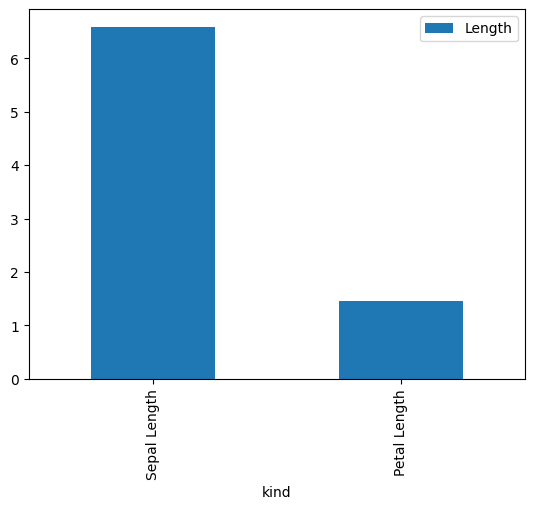

In [60]:
pd.DataFrame({"kind":["Sepal Length","Petal Length"], "Length":[sepal, petal]}).plot(x="kind", kind="bar")

### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle. 

In [61]:
pd.merge(virginica, sepal_all, on="Id")

,Unnamed: 0_x,Id,Species,Unnamed: 0_y,SepalLengthCm,SepalWidthCm
0,100,101,Iris-virginica,100,6.3,3.3
1,101,102,Iris-virginica,101,5.8,2.7
2,102,103,Iris-virginica,102,7.1,3.0
3,103,104,Iris-virginica,103,6.3,2.9
4,104,105,Iris-virginica,104,6.5,3.0
5,105,106,Iris-virginica,105,7.6,3.0
6,106,107,Iris-virginica,106,4.9,2.5
7,107,108,Iris-virginica,107,7.3,2.9
8,108,109,Iris-virginica,108,6.7,2.5
9,109,110,Iris-virginica,109,7.2,3.6


In [64]:
v_sepal = pd.merge(virginica, sepal_all, on="Id").drop(columns=["Unnamed: 0_x", "Unnamed: 0_y"])

In [71]:
v = pd.merge(v_sepal,petal_all, on="Id").drop(columns=["Unnamed: 0"])

In [72]:
s_sepal = pd.merge(setosa, sepal_all, on="Id").drop(columns= ["Unnamed: 0_x", "Unnamed: 0_y"])
s = pd.merge(s_sepal, petal_all, on="Id").drop(columns= ["Unnamed: 0"])

In [73]:
ver_sepal = pd.merge(versicolor, sepal_all, on="Id").drop(columns= ["Unnamed: 0_x", "Unnamed: 0_y"])
ver = pd.merge(ver_sepal, petal_all, on="Id").drop(columns= ["Unnamed: 0"])

In [74]:
pd.concat([v, s, ver]).sample(150)

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
40,141,Iris-virginica,6.7,3.1,5.6,2.4
25,76,Iris-versicolor,6.6,3.0,4.4,1.4
17,68,Iris-versicolor,5.8,2.7,4.1,1.0
29,130,Iris-virginica,7.2,3.0,5.8,1.6
21,122,Iris-virginica,5.6,2.8,4.9,2.0
...,...,...,...,...,...,...
33,134,Iris-virginica,6.3,2.8,5.1,1.5
29,80,Iris-versicolor,5.7,2.6,3.5,1.0
45,146,Iris-virginica,6.7,3.0,5.2,2.3
35,86,Iris-versicolor,6.0,3.4,4.5,1.6


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [ ]:

print(f"Minimum Sepal width of Setosa is {s.SepalWidthCm.min()}")
print(f"Maximum Sepal width of Setosa is {s.SepalWidthCm.max()}")
print(f"Minimum Petal width of Setosa is {s.PetalWidthCm.min()}")
print(f"Maximum Petal width of Setosa is {s.PetalWidthCm.max()}")
print(f"Minimum Sepal width of Versicolor is {ver.SepalWidthCm.min()}")
print(f"Maximum Sepal width of Versicolor is {ver.SepalWidthCm.max()}")
print(f"Minimum Petal width of Versicolor is {ver.PetalWidthCm.min()}")
print(f"Maximum Petal width of Versicolor is {ver.PetalWidthCm.max()}")

Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4
Minimum Petal width of Setosa is 0.1
Maximum Petal width of Setosa is 0.6
Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4
Minimum Petal width of Versicolor is 1.0
Maximum Petal width of Versicolor is 1.8
